In [17]:
import numpy as np
import matplotlib.pyplot as plt
import propagator

In [18]:
wavelength = 0.400
prop = propagator.Propagator(wavelength)

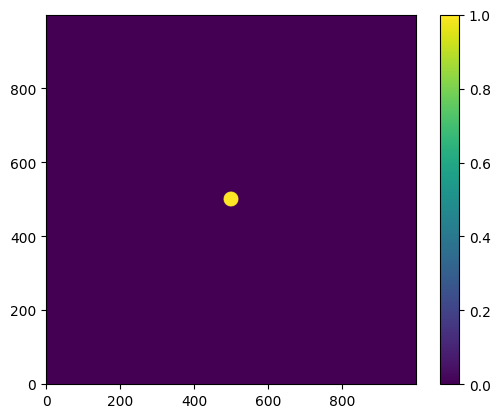

In [19]:
domain_size = [50.0,50.0]
N_samples = [1000,1000]

x = np.linspace(-domain_size[0]/2,domain_size[0]/2,N_samples[0])
y = np.linspace(-domain_size[1]/2,domain_size[1]/2,N_samples[1])

X,Y = np.meshgrid(x,y)

gaussian_field = np.exp(-(X**2 + Y**2))

circular_aperture = np.zeros(N_samples)
circular_aperture[X**2+Y**2<1]=1

plt.imshow(circular_aperture, origin="lower")
plt.colorbar()
plt.show()

In [20]:
z_values = np.linspace(0,10,50)
#prop.load_input_field(gaussian_field,domain_size)
prop.load_input_field(circular_aperture,domain_size)
prop.get_angular_spectrum()
prop.propagate(z_values)

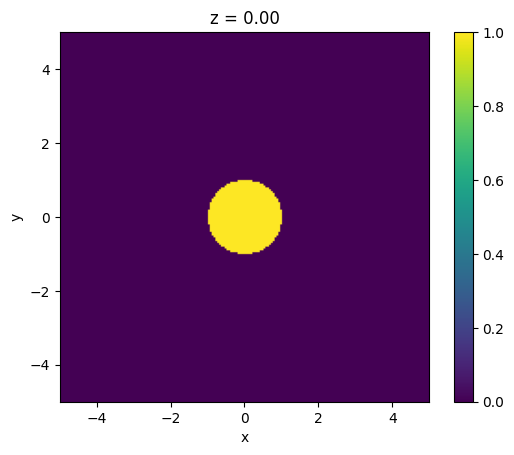

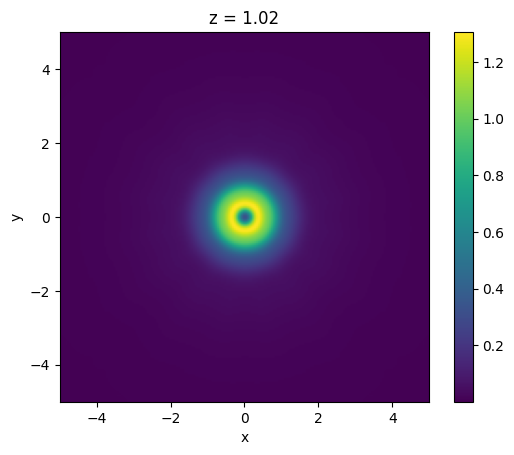

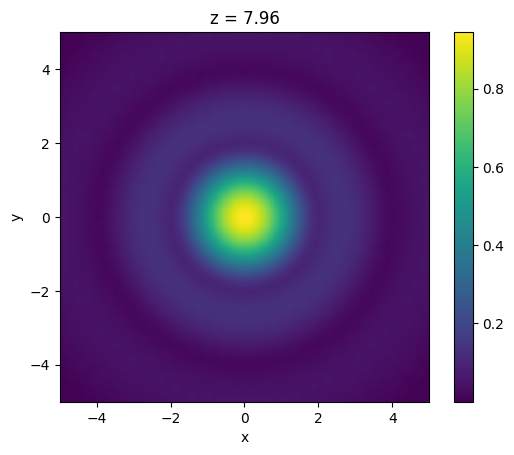

In [21]:
prop.plot_xy(0.0,xlim=(-5,5),ylim=(-5,5))
prop.plot_xy(1.0,xlim=(-5,5),ylim=(-5,5))
prop.plot_xy(8.0,xlim=(-5,5),ylim=(-5,5))
plt.show()


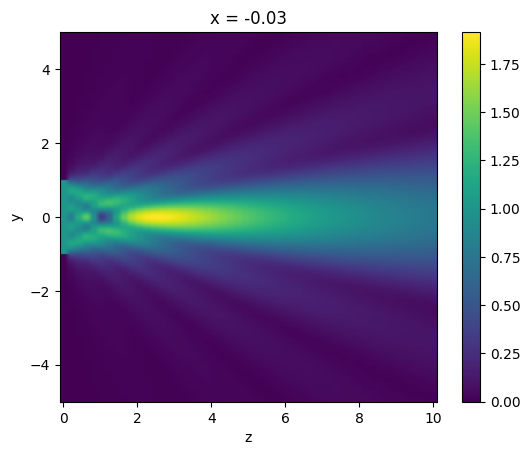

In [22]:
prop.plot_zy(0,ylim=(-5,5))
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


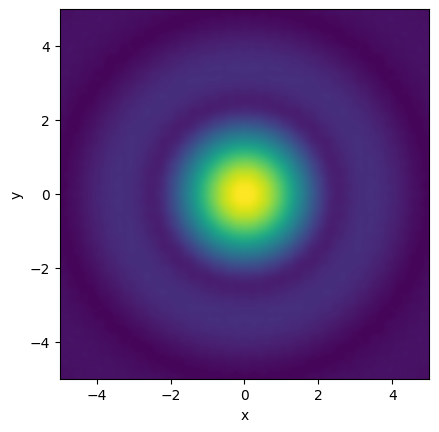

In [23]:
ani = prop.animation_xy(xlim=(-5,5),ylim=(-5,5))
ani.save("animation.gif")